In [1]:
import os
from classes import MCS_Finder
import datetime
import re
import sys
sys.path.append("../../module")
from rdkit.Chem import rdDepictor
import kcf.converter as kcfco
from rdkit import Chem

from nxrd.Compound import Compound

In [2]:
c = Compound()

In [3]:
hanni = []
for i in range(1, 52):
    page = str(i)
    with open("../../../database/knapsack-kcf/KNApSAck" + page + ".kcf")as f1:
        clist = f1.read().split()
        hanni.append(clist[1])
print(hanni)

['C00000001', 'C00001119', 'C00002144', 'C00003163', 'C00004172', 'C00005175', 'C00006180', 'C00007188', 'C00008214', 'C00009218', 'C00010225', 'C00011238', 'C00012247', 'C00013252', 'C00014261', 'C00015266', 'C00016267', 'C00017271', 'C00018274', 'C00019276', 'C00020285', 'C00021288', 'C00022289', 'C00023292', 'C00024299', 'C00025305', 'C00026310', 'C00027314', 'C00028321', 'C00029327', 'C00030330', 'C00031343', 'C00032344', 'C00033345', 'C00034347', 'C00035347', 'C00036350', 'C00037352', 'C00038354', 'C00039356', 'C00040358', 'C00041361', 'C00042362', 'C00043363', 'C00044366', 'C00045369', 'C00046369', 'C00047370', 'C00048371', 'C00049371', 'C00050371']


In [4]:
i = "C00016546"
num = 16546
mol_list = []
nCnumber = []
for p, k in enumerate(hanni[1:]):
    k2 = int(k[1:])
    if k2 > num:
        k3 = str(p+1)
        with open("../../../database/knapsack-kcf/KNApSAck" + k3 + ".kcf")as f2:
            Clist = f2.read().split("///\n")
            try:
                for C in Clist:
                    if i == C.split()[1]:
                        molblock = kcfco.kcf_to_molblock(C)
                        # print("OK", i)
                        # print(molblock[1])
                        mol = Chem.MolFromMolBlock(molblock[1])
                        if mol is None:
                            print("None", i, z, k3)
                            if "#+" in C or "#-" in C:
                                print("Charge in\n")
                            counter += 1
                            break
                        # rdDepictor.Compute2DCoords(mol)
                        mol_list.append(mol)
                        nCnumber.append(i)
                        if "#+" in C or "#-" in C:
                            print(i, z, k3, "Charge in\n")
                        break
            except IndexError:
                counter += 1
                print("DAME", i, z)
        break

In [5]:
print(mol_list)

In [6]:
c.input_rdkmol(mol_list[0])

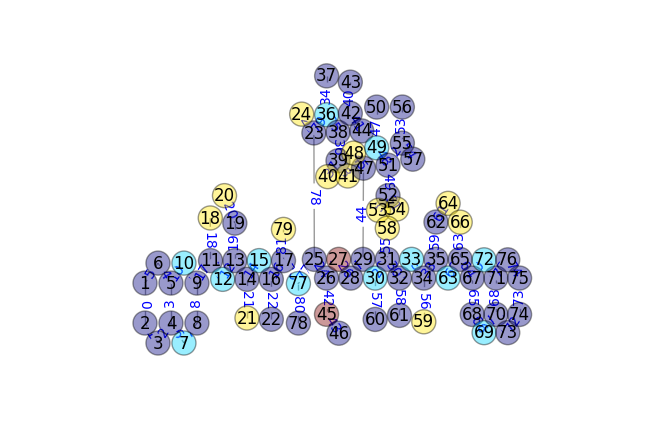

In [7]:
%matplotlib inline
c.draw_cpd_with_labels()

C00016564の表示がおかしいのはrdkitの二次元座標計算のせい？  
元から入っている二次元座標を使えば綺麗にかけた  
一方で元から入っているやつを使うとシクロヘキサンなどの構造が立体になっている。test/test_noD.png  
ベンゼン環とかも模式的になって見やすくなったが、一部見にくいものができてしまった。

C番号から化合物名を持ってきたい。

In [8]:
import requests
import lxml.html

In [ ]:
html = requests.get("http://kanaya.naist.jp/knapsack_jsp/information.jsp?word=C00016546")

In [ ]:
print(html)

In [ ]:
dom = lxml.html.fromstring(html.text)

In [ ]:
dom.xpath('//*[@id="my_contents"]/table/tr[2]/td[1]/table/tr[1]/td')[0].text

In [ ]:
def get_name(Cnumber):
    import requests
    import lxml.html
    html = requests.get("http://kanaya.naist.jp/knapsack_jsp/information.jsp?word=" + Cnumber)
    dom = lxml.html.fromstring(html.text)
    name = dom.xpath('//*[@id="my_contents"]/table/tr[2]/td[1]/table/tr[1]/td')[0].text
    return name

In [46]:
print(get_name("C00016546"))

Echinoserine


In [10]:
ari = []
for genus in os.listdir("test"):
    if genus == ".DS_Store" or genus == "others":
        continue
    elif os.listdir("test/" + genus) == []:
        continue
    else:
        ari.append(genus)

In [11]:
def gCfl(genus, label):
    import re
    label_list = re.split("[-()]", label)
    sep_list = re.split("[a-zA-Z][0-9]?[a-z]?", label)
    query = ""
    for i in range(label_list.count("")):
        label_list.remove("")
    for i in range(len(label_list)):
        label_list[i] += "[0-9]?[a-z]?"
    for l1, l2 in zip(sep_list, label_list):
        query += l1 + l2
    query = re.sub("\(", "[(]", query)
    query = re.sub("\)", "[)]", query)
    query += "\s"
    query = "\s" + query
    with open("test/" + genus + "/kcfs.kcfs")as f:
        file = f.read()
        molecule = file.split("///\n")
        Cnlist = []
        for mole in molecule:
            if re.search(query, mole) is not None:
                Cn = mole.split("\n")[0].split()[1]
                Cnlist.append(Cn)
        return Cnlist

In [12]:
for genus in ari:
    Cnlist = gCfl(genus, 'C-C-C-C-C-N-C-C-N-C')
    if Cnlist != []:
        onlyst = Cnlist

In [13]:
print(onlyst, len(onlyst))

['C00015085', 'C00015086', 'C00015087', 'C00015088', 'C00015391', 'C00016096', 'C00016144', 'C00016355', 'C00016356', 'C00016546', 'C00016588', 'C00016589', 'C00016610', 'C00016611', 'C00016882', 'C00017629', 'C00017688', 'C00017694', 'C00017984', 'C00018470', 'C00018609', 'C00018656', 'C00018678', 'C00018693', 'C00018694', 'C00018695', 'C00018696', 'C00018732', 'C00018733', 'C00027021', 'C00027022', 'C00040392', 'C00040393', 'C00040394', 'C00040395', 'C00040396', 'C00040397', 'C00040398', 'C00040399'] 39


In [14]:
%%time
import time
import datetime
Cname = dict()
print(datetime.datetime.now())
for Cnumber in onlyst:
    name = get_name(Cnumber)
    Cname[Cnumber] = name
    time.sleep(10)

2017-10-29 00:03:09.616363


NameError: name 'get_name' is not defined

In [57]:
print(Cname)

{'C00016610': 'Phencomycin', 'C00016356': 'Phenazostatin B', 'C00016588': 'SB 212021', 'C00017694': 'Lavanducyanin', 'C00027021': 'Maremycin E', 'C00027022': 'Maremycin F', 'C00018694': 'Quinomycin C', 'C00040398': 'Streptophenazine G', 'C00017984': '8-Dimethylaminoriboflavin', 'C00016546': 'Echinoserine', 'C00040392': 'Streptophenazine A', 'C00016882': 'HR 04', 'C00018695': 'Triostin A', 'C00018732': 'Quinomycin B0', 'C00018470': 'Saphenamycin', 'C00018733': 'Quinomycin E', 'C00018609': 'Phenacein', 'C00040399': 'Streptophenazine H', 'C00018656': 'Griseolutein B', 'C00018696': 'Triostin C', 'C00015085': 'Endophenazine A', 'C00015087': 'Endophenazine C', 'C00016611': 'Aestivophoenin A', 'C00016144': 'Aestivophoenin B', 'C00015391': 'Phenazostatin C', 'C00016096': 'Aestivophoenin C', 'C00040396': 'Streptophenazine E', 'C00015088': 'Endophenazine D', 'C00018693': 'Quinomycin B', 'C00017688': '(-)-Phenazinomycin', 'C00040395': 'Streptophenazine D', 'C00040394': 'Streptophenazine C', 'C000

In [58]:
len(Cname)

39

In [61]:
sorted(Cname.items(), key=lambda x: x[0])

[('C00015085', 'Endophenazine A'),
 ('C00015086', 'Endophenazine B'),
 ('C00015087', 'Endophenazine C'),
 ('C00015088', 'Endophenazine D'),
 ('C00015391', 'Phenazostatin C'),
 ('C00016096', 'Aestivophoenin C'),
 ('C00016144', 'Aestivophoenin B'),
 ('C00016355', 'Phenazostatin A'),
 ('C00016356', 'Phenazostatin B'),
 ('C00016546', 'Echinoserine'),
 ('C00016588', 'SB 212021'),
 ('C00016589', 'SB 212305'),
 ('C00016610', 'Phencomycin'),
 ('C00016611', 'Aestivophoenin A'),
 ('C00016882', 'HR 04'),
 ('C00017629', 'DC 86Y'),
 ('C00017688', '(-)-Phenazinomycin'),
 ('C00017694', 'Lavanducyanin'),
 ('C00017984', '8-Dimethylaminoriboflavin'),
 ('C00018470', 'Saphenamycin'),
 ('C00018609', 'Phenacein'),
 ('C00018656', 'Griseolutein B'),
 ('C00018678', '1,6-Dihydroxyphenazine'),
 ('C00018693', 'Quinomycin B'),
 ('C00018694', 'Quinomycin C'),
 ('C00018695', 'Triostin A'),
 ('C00018696', 'Triostin C'),
 ('C00018732', 'Quinomycin B0'),
 ('C00018733', 'Quinomycin E'),
 ('C00027021', 'Maremycin E'),
 (

名前から抜けてそうなものが予測できる？

In [66]:
for genus in ari:
    Cnlist = gCfl(genus, 'C-C-C-C-C-N-C-C-N-C')
    if Cnlist != []:
        print(genus)
        print(Cnlist)
        print()

Streptomyces
['C00015085', 'C00015086', 'C00015087', 'C00015088', 'C00015391', 'C00016096', 'C00016144', 'C00016355', 'C00016356', 'C00016546', 'C00016588', 'C00016589', 'C00016610', 'C00016611', 'C00016882', 'C00017629', 'C00017688', 'C00017694', 'C00017984', 'C00018470', 'C00018609', 'C00018656', 'C00018678', 'C00018693', 'C00018694', 'C00018695', 'C00018696', 'C00018732', 'C00018733', 'C00027021', 'C00027022', 'C00040392', 'C00040393', 'C00040394', 'C00040395', 'C00040396', 'C00040397', 'C00040398', 'C00040399']



In [72]:
for genus in ari:
    Cnlist = gCfl(genus, 'C-C-C-C-C-C-N-C-C-N')
    if Cnlist != []:
        print(genus)
        print(Cnlist)
        print()

Streptomyces
['C00015930', 'C00015931', 'C00016426', 'C00016427', 'C00016428', 'C00016429', 'C00018432']



位置のずれたNを2個含む10員環

In [79]:
for genus in ari:
    Cnlist = gCfl(genus, 'C-C-C-N-C-C-N-C-C-C')
    if Cnlist != []:
        print(genus)
        print(Cnlist)
        print()

Saccharothrix
['C00017093']

Streptomyces
['C00017821', 'C00017822', 'C00017823', 'C00018157', 'C00018158', 'C00018159', 'C00018160', 'C00018161', 'C00018299', 'C00018482', 'C00018500']



In [80]:
for genus in ari:
    Cnlist = gCfl(genus, 'C-C-C-C-N-C-C-N-C-C')
    if Cnlist != []:
        print(genus)
        print(Cnlist)
        print()

Streptomyces
['C00015391', 'C00018656', 'C00018764']



これらは同じカテゴリに含まれるべきではないのか  
レベルを一段上げて絞ってみる？

In [83]:
for genus in ari:
    Cnlist = gCfl(genus, 'C8-C8-C8-C8-C8-N5-C8-C8-N5-C8')
    if Cnlist != []:
        print(genus)
        print(Cnlist)
        print()

Streptomyces
['C00015085', 'C00015391', 'C00016355', 'C00016356', 'C00016546', 'C00016588', 'C00016589', 'C00016610', 'C00016882', 'C00017629', 'C00018470', 'C00018609', 'C00018656', 'C00018678', 'C00018693', 'C00018694', 'C00018695', 'C00018696', 'C00018732', 'C00018733', 'C00040392', 'C00040393', 'C00040394', 'C00040395', 'C00040396', 'C00040397', 'C00040398', 'C00040399']



In [84]:
def check(label, aite):
    label_list = re.split("[-()]", label)
    sep_list = re.split("[a-zA-Z][0-9]?[a-z]?", label)
    query = ""
    for i in range(label_list.count("")):
        label_list.remove("")
    for i in range(len(label_list)):
        label_list[i] += "[0-9]?[a-z]?"
    for l1, l2 in zip(sep_list, label_list):
        query += l1 + l2
    query = re.sub("\(", "[(]", query)
    query = re.sub("\)", "[)]", query)
    if re.search(query, aite) is not None:
        return True
    else:
        return False

In [86]:
import re
counter = 0
coun = 0
label = 'C8-C8-C8-C8-C8-N5-C8-C8-N5-C8'
with open("test/Streptomyces/kcfs.kcfs", "r")as f:
    moles = f.read().split("///\n")
    for Cn in onlyst:
        for mole in moles[:-1]:
            if Cn == mole.split()[1]:
                coun += 1
                print(Cn)
                for line in mole.split("\n"):
                    i = 0
                    if len(line.split()) < 2:
                        continue
                    elif line.split()[i] == "SKELETON":
                        # print("SKE")
                        i += 1
                    elif line.split()[i] == "RING":
                        # print("RIN")
                        i += 1
                    if check(label, line.split()[i]):
                        print(line.split()[i+1][1:-1])
                        counter += int(line.split()[i+1][1:-1])



C00015085
2
C00015086
C00015087
C00015088
C00015391
2
1
C00016096
C00016144
C00016355
2
1
1
C00016356
4
C00016546
2
C00016588
1
1
C00016589
1
1
C00016610
2
C00016611
C00016882
2
C00017629
2
C00017688
C00017694
C00017984
C00018470
2
C00018609
1
1
C00018656
1
C00018678
2
C00018693
2
C00018694
2
C00018695
2
C00018696
2
C00018732
2
C00018733
2
C00027021
C00027022
C00040392
2
C00040393
2
C00040394
2
C00040395
2
C00040396
2
C00040397
2
C00040398
2
C00040399
2


In [87]:
for genus in ari:
    Cnlist = gCfl(genus, 'C1b-C1b')
    if Cnlist != []:
        print(genus)
        print(Cnlist)
        print()

Actinomadura
['C00016362', 'C00016363', 'C00017056', 'C00018818']

Actinomyces
['C00015499']

Actinoplanes
['C00015640', 'C00015641', 'C00015642', 'C00015643', 'C00018504', 'C00018520']

Agromyces
['C00023077', 'C00023078']

Amycolatopsis
['C00017124', 'C00017125', 'C00017627', 'C00017628']

Arthrobacter
['C00016253', 'C00022972']

Corynebacterium
['C00016097', 'C00023076', 'C00023079', 'C00023080', 'C00023085', 'C00023096', 'C00023097']

Kibdelosporangium
['C00016757', 'C00017805', 'C00017806', 'C00017807', 'C00017808', 'C00017809']

Kitasatospora
['C00015142', 'C00018596']

Kocuria
['C00023100']

Lechevalieria
['C00016302', 'C00016305', 'C00016306']

Microbispora
['C00015176', 'C00015221', 'C00015222', 'C00015223', 'C00016037', 'C00016038', 'C00016039', 'C00016040', 'C00017922']

Micromonospora
['C00015576', 'C00016159', 'C00016160', 'C00016196', 'C00016197', 'C00016198', 'C00016389', 'C00016397', 'C00016897', 'C00016898', 'C00018308', 'C00018396', 'C00027976']

Microtetraspora
['C00

In [15]:
for genus in ari:
    Cnlist = gCfl(genus, 'C1-C1-C5-C1-C1-C1')
    if Cnlist != []:
        print(genus)
        print(Cnlist)
        print()
        onlyst = Cnlist

Streptomyces
['C00015015', 'C00017167', 'C00017168', 'C00017171', 'C00017289', 'C00017714', 'C00017715', 'C00017716', 'C00018065', 'C00018066', 'C00018333', 'C00018334', 'C00018335', 'C00018350', 'C00018384', 'C00018405', 'C00018521', 'C00018522', 'C00018523', 'C00018644', 'C00039228', 'C00039797', 'C00039798']



In [17]:
print(len(onlyst))

23


In [90]:
import sys
sys.path.append("../../module")
from rdkit.Chem import rdDepictor
import kcf.converter as kcfco
from rdkit import Chem
mol_list = []
counter = 0
nCnumber = []
for z, i in enumerate(sorted(onlyst)):
    num = int(i[1:])
    for p, k in enumerate(hanni[1:]):
        k2 = int(k[1:])
        if k2 > num:
            k3 = str(p+1)
            with open("../../../database/knapsack-kcf/KNApSAck" + k3 + ".kcf")as f2:
                Clist = f2.read().split("///\n")
                try:
                    for C in Clist:
                        if i == C.split()[1]:
                            molblock = kcfco.kcf_to_molblock(C)
                            # print("OK", i)
                            # print(molblock[1])
                            mol = Chem.MolFromMolBlock(molblock[1])
                            if mol is None:
                                print("None", i, z, k3)
                                if "#+" in C or "#-" in C:
                                    print("Charge in\n")
                                counter += 1
                                break
                            rdDepictor.Compute2DCoords(mol)
                            mol_list.append(mol)
                            nCnumber.append(i)
                            if "#+" in C or "#-" in C:
                                print(i, z, k3, "Charge in\n")
                            break
                except IndexError:
                    counter += 1
                    print("DAME", i, z)
            break
print(counter)

0


In [91]:
from rdkit.Chem import Draw
img = Draw.MolsToGridImage(mol_list, legends=sorted(onlyst), subImgSize=(400, 400))
img.save("test/others/testonlyst2.png")

In [ ]:
from rdkit.Chem import rdFMCS
mcs = rdFMCS.FindMCS(mol_list)
mcs_smarts = mcs.smartsString
mcsMol = Chem.MolFromSmarts(mcs_smarts, mergeHs=True)
Draw.MolToFile(Chem.Mol(mcsMol.ToBinary()), "test/others/mcstest.png", kekulize=False)